<a href="https://colab.research.google.com/github/vandarsar/Linear-regression/blob/main/Arcada_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importation of libraries and data ingestion

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.ticker import ScalarFormatter, FuncFormatter, StrMethodFormatter
%matplotlib inline
from datetime import datetime
import seaborn as sns
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # MAE, RMSE, R2 score
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler #standardization scaler library
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet    #importing ElasticNet library
from sklearn.cluster import KMeans  # importing kmeans for unsupervised learning  
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # importing decision tree classifier & Regressor for supervised leaning
from sklearn.metrics import accuracy_score, precision_score, recall_score   # accruacy_score for calculating models' accuracies
#import mplfinance as mpf            # for mpl finance
import plotly.graph_objects as go   # importing plotly
from sklearn.datasets import fetch_20newsgroups_vectorized    # to fetch dataset
from sklearn.decomposition import PCA, KernelPCA    # importing principal component Analysis, KernelPCA

from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score 
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from functools import reduce
from operator import mul
from pprint import PrettyPrinter
pprint = PrettyPrinter().pprint
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.linear_model import LinearRegression ,Lasso
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [ ]:
path = "/content/drive/MyDrive/Colab datasets/train[1].csv" # file path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(path)

Exploratory data analyses and Data cleaning




In [ ]:
pd.set_option('display.max_columns', None) # allows me to see the whole features and preview the values
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.8375,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.8900,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.25,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,3306.162897,3592.019281,81.8375,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.9055,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,775.425,1

In [ ]:
df.shape   # the data has 21263 rows and 82 columns, my biggest in terms of feature number till date

(21263, 82)

In [ ]:
df.dtypes             # No column is string so, these are good to be fed to ML algorithm

number_of_elements         int64
mean_atomic_mass         float64
wtd_mean_atomic_mass     float64
gmean_atomic_mass        float64
wtd_gmean_atomic_mass    float64
                          ...   
range_Valence              int64
wtd_range_Valence        float64
std_Valence              float64
wtd_std_Valence          float64
critical_temp            float64
Length: 82, dtype: object

In [ ]:
df.duplicated().sum()  # checking duplicates

66

In [ ]:
df.drop_duplicates() # drop the 66 duplicate data

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425000,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.250000,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.837500,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.905500,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440000,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.200000,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.890000,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.784400,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425000,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.250000,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,3306.162897,3592.019281,81.837500,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.905500,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.

In [ ]:
df.isnull().sum()

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
critical_temp            0
Length: 82, dtype: int64

In [ ]:
df.info() # there was no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [ ]:
df.describe() # All features are within range 

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,41.448045,769.614748,870.442317,737.474751,832.769649,1.299172,0.926726,572.222612,483.517264,215.631279,224.050033,157.983101,134.720039,144.448738,120.989330,1.267756,1.131138,139.325025,51.369885,51.601267,52.340465,6111.465214,5267.188547,3460.692235,3117.241110,1.072425,0.856037,8665.438818,2902.736814,3416.910784,3319.170628,76.879751,92.717486,54.359502,72.416225,1.070250,0.770757,120.730514,59.332637,48.912207,44.409356,14.296113,13.848001,10.136977,10.141161,1.093343,0.914065,21.138994,8.218528,8.323333,7.717576,89.706911,81.549080,29.841727,27.308061,0.727630,0.539991,250.893443,62.033066,98.943993,96.234051,3.198228,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,19.983544,87.488694,143.278200,78.327275,119.772520,0.381935,0.334018,309.614442,224.042874,109.966774,127.927104,20.147288,28.801567,22.090958,35.837843,0.375411,0.407159,67.272228,35.019356,22.898396,25.294524,2846.785185,3221.314506,3703.256370,3975.122587,0.342356,0.319761,4097.126831,2398.471020,1673.624915,1611.799629,27.701890,32.276387,29.007425,31.648444,0.343391,0.285986,58.700327,28.620

## Task 1

Feature enginering, Data Preprocessing and Data visualisations

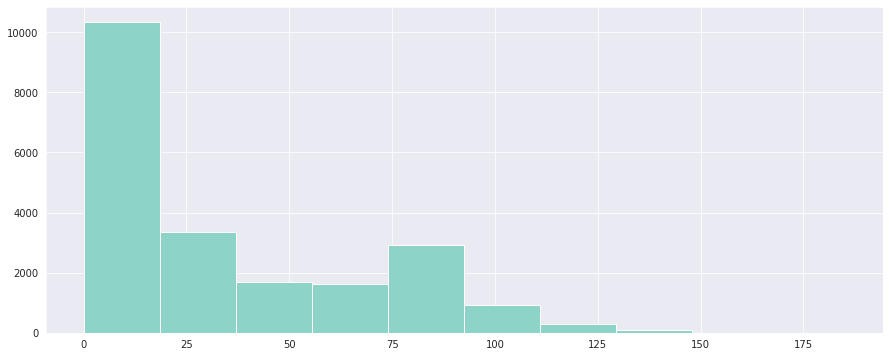

In [ ]:
df.critical_temp.hist(figsize=(15,6)) # the target variable is positively skewed
plt.show()

In [ ]:
# from the figure above, it is evident thatthe variables should be scaled to the same level to enhance better generalization by the model
# I'm going to use the standardisation techniques because I'm going to fit 2 different regression models in which case the algorithm asumed the data is or close to a gausian (normal distribution) values

In [ ]:
X_features = df.drop(labels="critical_temp", axis=1) # droping the temprature's column
y_target = df.critical_temp

In [ ]:
scaler_X_features = StandardScaler()    # instantiating the standardscaler
X_scaled = scaler_X_features.fit_transform(X_features)

In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns=X_features.columns)

In [ ]:
X_scaled.describe()       # the std of ones shows that the data is standardised

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
count,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,21263.000000,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,21263.000000,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,21263.000000,2.126300e+04,2.126300e+04,2.126300e+04,21263.000000,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,21263.000000,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04,2.126300e+04
mean,2.138679e-17,-2.085212e-16,-4.384292e-16,-8.287382e-17,2.138679e-17,1.710943e-16,9.089386e-17,-1.283207e-16,1.069340e-17,-2.031745e-16,-5.346698e-17,-4.705094e-16,-5.774434e-16,7.806179e-16,6.416037e-16,-5.881368e-16,2.673349e-16,-2.138679e-16,4.277358e-16,1.069340e-17,0.000000,8.447783e-16,5.400165e-16,-1.598663e-15,2.566415e-16,-2.459481e-16,-2.833750e-16,-3.208019e-17,1.229741e-16,2.138679e-16,1.069340e-16,1.203007e-16,-1.710943e-16,-1.497075e-16,0.000000,-3.314953e-16,1.470342e-16,2.486215e-16,-8.421049e-17,-2.532998e-16,-1.604009e-16,-1.710943e-16,0.000000,1.283207e-16,9.624056e-17,-2.673349e-16,0.000000,1.176274e-16,1.283207e-16,1.069340e-17,3.314953e-16,-1.069340e-17,1.283207e-16,5.346698e-18,-9.624056e-17,-2.619882e-16,2.031745e-16,1.924811e-16,1.283207e-16,2.673349e-17,-6.416037e-17,0.000000,-1.710943e-16,8.020047e-17,5.346698e-17,-1.604009e-16,-3.635755e-16,3.208019e-16,-6.416037e-17,1.283207e-16,1.069340e-16,4.277358e-16,1.710943e-16,-4.277358e-17,3.208019e-16,3.635755e-16,1.604009e-17,1.924811e-16,4.277358e-17,1.069340e-16,1.497075e-16
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024,1.000024e+00,1.

In [ ]:
scaled_df = X_scaled.merge(y_target, left_index=True, right_index=True) #merging the y dataframe back into X_scaled dataframe 

In [ ]:
scaled_df.head(2)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,-0.080058,0.046733,-0.451651,-0.158850,-0.611819,0.044358,-0.003707,0.133725,-0.053039,0.378186,0.609240,0.066413,0.975930,-0.246687,0.878746,0.017791,-0.404893,0.769935,1.126902,0.983780,1.028054,0.112519,-1.014057,-0.376757,-1.017410,-0.022674,0.186424,0.97628,-0.241461,1.032248,0.667951,-0.511855,-0.715776,-0.738756,-0.770736,-0.114783,-0.129595,0.071547,-0.551678,-0.066174,0.157235,0.178972,0.588979,0.198701,0.853094,0.260458,0.058134,0.107659,0.756628,0.115985,-0.090605,-0.654041,-0.700409,-0.661407,-0.692887,-0.012682,0.218671,-0.405544,-0.567204,-0.429486,-0.418582,0.468622,-0.451114,-0.668821,-0.663995,-1.286879,-0.870857,0.939383,-0.113755,1.162423,0.663693,-0.907755,-0.752156,-0.805912,-0.711705,0.186292,0.035183,-0.837959,-0.406166,-0.838372,-0.520070,29.0
1,0.614744,0.174269,-0.432071,0.059368,-0.604180,0.777430,-0.015267,0.133725,0.108900,0.134901,0.627122,-0.036288,0.978333,-0.215374,0.884829,0.641414,-0.358216,0.769935,1.158944,0.677964,1.023368,0.159673,-1.032906,-0.135059,-1.021826,0.640837,0.179239,0.97628,-0.022801,0.686529,0.619451,-0.101864,-0.697301,-0.600458,-0.770597,0.706934,0.183784,0.444989,-0.515071,0.209426,0.194494,0.505763,0.607237,0.533456,0.908444,1.041830,0.237464,0.107659,0.764340,0.024193,-0.134209,-0.576262,-0.703911,-0.569579,-0.693324,0.749180,0.429674,-0.405544,-0.580246,-0.443982,-0.427353,2.141893,-0.443268,-0.404521,-0.664051,0.367440,0.087089,1.128420,-0.246269,1.656261,0.681175,-1.147084,-0.752156,-1.116731,-0.719454,0.664971,-0.014779,-0.033011,-0.362352,-0.426866,-0.450821,26.0


In [ ]:
X = scaled_df.drop(labels="critical_temp", axis=1)
y = df.critical_temp

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

Linear Regression analyses

In [ ]:
linreg_model = LinearRegression()

In [ ]:
linreg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
linreg_model.score(X_train, y_train).round(4)

0.7368

In [ ]:
linreg_model.score(X_test, y_test).round(4)

0.7375

In [ ]:
y_pred = linreg_model.predict(X_test)

# other regressions

In [ ]:
#part1 : Fit two regression models to predict the critical temperature.
# Report the score with the default parameters of each model.

# model 1  : linear regression 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#normalization 
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.concatenate((np.ones([X_train.shape[0],1]),X_train),axis = 1)
X_test = np.concatenate((np.ones([X_test.shape[0],1]),X_test),axis = 1)


reg_model_1 = LinearRegression(fit_intercept=False)
reg_model_1.fit(X_train, y_train)

score_train = reg_model_1.score(X_train, y_train)
score_test = reg_model_1.score(X_test, y_test)
print('model 1') 
print('score_train : ',score_train)
print('score_test : ',score_test)

# model 2 : Ridge regression 

reg_model_2 = Ridge()
reg_model_2.fit(X_train,y_train)
score_train = reg_model_2.score(X_train, y_train)
score_test = reg_model_2.score(X_test, y_test)
print('model 2') 
print('score_train : ',score_train)
print('score_test : ',score_test)

# model 3  : Lasso regression 

reg_model_3 = Lasso()
reg_model_3.fit(X_train,y_train)
score_train = reg_model_3.score(X_train, y_train)
score_test = reg_model_3.score(X_test, y_test)
print('model 3') 
print('score_train : ',score_train)
print('score_test : ',score_test)


model 1
score_train :  0.739754485560506
score_test :  0.7279908561791887
model 2
score_train :  0.7394741463025508
score_test :  0.7274584135406323
model 3
score_train :  0.6538711923893137
score_test :  0.6499049988055456


hyperparameter tuning of ridge regressor

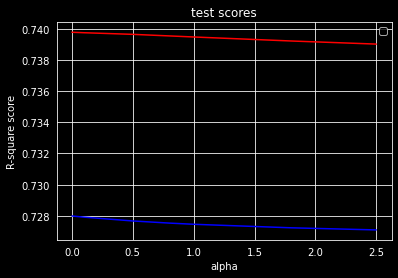

In [ ]:
#part2 :
# Perform a simple manual optimization for Ridge regression for  alpha  parameter
alpha_values = [0, 0.1, 0.5 , 0.8 , 1 ,1.8 ,2.5]
all_score_train =[]
all_score_test = []
for alpha in alpha_values:
    reg_model_3 = Ridge(alpha=alpha)
    reg_model_3.fit(X_train,y_train)
    score_train = reg_model_3.score(X_train, y_train)
    all_score_train.append(score_train)
    score_test = reg_model_3.score(X_test, y_test)    
    all_score_test.append(score_test)

plt.subplot()
plt.plot(alpha_values ,all_score_train, color="r")
plt.plot(alpha_values ,all_score_test, color="b")
plt.title('Ridge')
plt.legend()
plt.title('test scores')
plt.xlabel("alpha")
plt.ylabel("R-square score")
plt.show()

In [ ]:
"""
The lower the alpha value, the better the score and therefore the regression. We know that ridge regression for alpha equal to 0 is the same as normal regression

"""

Decision tree analyses

In [ ]:
trees = DecisionTreeRegressor()
tree_model = trees.fit(X_train, y_train)

In [ ]:
tree_model.score(X_train, y_train).round(3)

0.986

In [ ]:
tree_model.score(X_test, y_test).round(3)

0.866

In [ ]:
# The tree model works better on the dataset than linear regressor.
# consequently, I will try to tune the decision tree model to get an optimum parameter that best achieve the highest accuracy.

# Parameter tunning for the tree algorithm


tunning for max_depth param using for loop

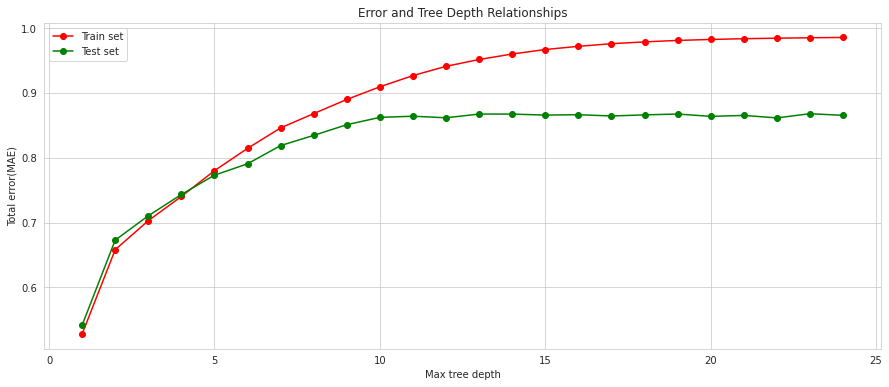

In [ ]:
error_train_set = []
error_test_set = []
error_index = []

for tuned_depth in range(1,25):
    bigtree = DecisionTreeRegressor(max_depth=tuned_depth, random_state=7)
    tuned_model = bigtree.fit(X_train, y_train)
    error_train_set.append(tuned_model.score(X_train, y_train))
    error_test_set.append(tuned_model.score(X_test, y_test))
    error_index.append(tuned_depth)





#getTotalAbsoluteError
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(error_index, error_train_set, color= "red", linewidth=1.5, marker = "o" )
ax.plot(error_index, error_test_set, color= "green", linewidth=1.5, marker = "o" )
ax.set_xlabel("Max tree depth")
ax.set_ylabel("Total error(MAE)")
ax.set_title("Error and Tree Depth Relationships")
ax.legend(["Train set", "Test set"])
plt.show()

# error score on both train and test set increases rapidly until it starts to diverge at tree depth of 5.
# 10 or 22 is the optimum point that maximized the error rate on both training and test sets, because at that point, error rate on test set just sort of flattens out and no observed increase was noticed.
# We must also balance the model complexity(increase max tree depth) with model errors.

In [ ]:
pd.DataFrame(error_train_set, columns=["train_set"]).merge(pd.DataFrame(error_test_set, columns=["test_set"]), left_index=True, right_index=True).head()

,train_set,test_set
0,0.528221,0.541798
1,0.658186,0.672907
2,0.702905,0.710425
3,0.740252,0.743295
4,0.780019,0.773063


tunning for min_sample_leaf and data visualisation


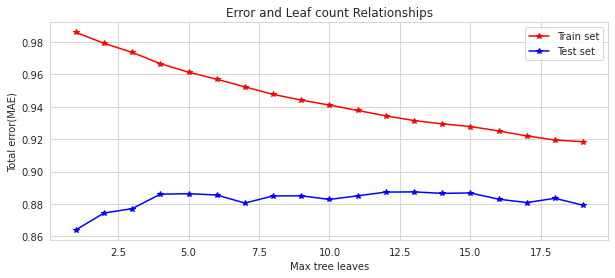

In [ ]:
error_train_leaf = []
error_test_leaf = []
error_index_leaf = []

for leaf in range(1,20):
    bigtree = DecisionTreeRegressor(min_samples_leaf = leaf, random_state=7)
    tuned_model = bigtree.fit(X_train, y_train)
    error_train_leaf.append(tuned_model.score(X_train, y_train))
    error_test_leaf.append(tuned_model.score(X_test, y_test))
    error_index_leaf.append(leaf)





#getTotalAbsoluteError
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(error_index_leaf, error_train_leaf, color= "red", linewidth=1.5, marker= "*")
ax.plot(error_index_leaf, error_test_leaf, color= "blue", linewidth=1.5, marker= "*")
ax.set_xlabel("Max tree leaves")
ax.set_ylabel("Total error(MAE)")
ax.set_title("Error and Leaf count Relationships")
ax.legend(["Train set", "Test set"])
plt.show()


In [ ]:
pd.DataFrame(error_train_leaf, columns=["train_set"]).merge(pd.DataFrame(error_test_leaf, columns=["test_set"]), left_index=True, right_index=True).head(3)

,train_set,test_set
0,0.986028,0.863950
1,0.979169,0.874380
2,0.973592,0.877091


In [ ]:
"""

As the error rate on test sets continues to fall, the MAE on train set on the other hand continued to rise. 
Node 4 offers the optimum balance between between both error rate.


"""

'\n\nAs the error rate on test sets continues to fall, the MAE on train set on the other hand continued to rise. \nNode 4 offers the optimum balance between between both error rate.\n\n\n'

Building a Decision Tree Algorithm with the optimum parameters of max_depth= 18, and min_samples_leaf = 4

In [ ]:
trees = DecisionTreeRegressor(max_depth=18, min_samples_leaf=4, random_state=7)

In [ ]:
optimised_tree_model = trees.fit(X_train, y_train)
optimised_tree_model = trees.fit(X_train, y_train)

Evaluation and commentaries

In [ ]:
optimised_tree_model.score(X_train, y_train).round(3)

0.963

In [ ]:
optimised_tree_model.score(X_test, y_test).round(3)

0.886

In [ ]:
"""
Ultimately we've been able to:

imported our libraries
ingested the data into IDE
Peromed basic data cleaning
performed EDA
performed data preprocessing like scaling, data splitting
performed two different regression analyses

fine tuned and looked for optimum values for the better performing algoritm

and finally achieve a greater score for the decision tree algorithm.
"""

"\nUltimately we've been able to:\n\nimported our libraries\ningested the data into IDE\nPeromed basic data cleaning\nperformed EDA\nperformed data preprocessing like scaling, data splitting\nperformed two different regression analyses\n\nfine tuned and looked for optimum values for the better performing algoritm\n\nand finally achieve a greater score for the decision tree algorithm.\n"

# Task 2

In [ ]:
df_2 = pd.read_csv("/content/drive/MyDrive/Colab datasets/Drug_Consumption_Quantified.csv")
len(df_2)
"""
df_2 = pd.read_csv('/content/drive/MyDrive/Big data/Machine Learningf for Predictive Problems/Assignment/Drug_Consumption_Quantified.csv')
len(df_2)
"""

"\ndf_2 = pd.read_csv('/content/drive/MyDrive/Big data/Machine Learningf for Predictive Problems/Assignment/Drug_Consumption_Quantified.csv')\nlen(df_2)\n"

In [ ]:
len(df_2)

1884

In [ ]:
# Data Cleaning

# Data Cleaning

In [ ]:
df_2.isna().sum().sum()

0

In [ ]:
df_2.query("Semer != 'CL0'")

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
726,730,-0.07854,0.48246,-1.73790,-0.09765,-0.31685,-0.58016,0.32197,0.14143,-0.60633,0.12331,1.29221,0.76540,CL6,CL2,CL2,CL2,CL6,CL6,CL5,CL2,CL2,CL2,CL2,CL2,CL0,CL4,CL2,CL6,CL6,CL2,CL2
816,821,-0.95197,-0.48246,-0.61113,-0.09765,-0.50212,-0.67825,1.74091,0.72330,0.13136,0.41594,0.88113,1.92173,CL3,CL0,CL0,CL0,CL6,CL4,CL5,CL0,CL0,CL3,CL0,CL0,CL0,CL5,CL0,CL5,CL4,CL3,CL0
1515,1520,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,-0.80615,-1.27553,-1.34289,-1.92173,-0.71126,0.07987,CL0,CL2,CL3,CL2,CL3,CL4,CL1,CL3,CL2,CL1,CL2,CL1,CL2,CL1,CL2,CL4,CL2,CL3,CL1
1532,1537,-0.95197,0.48246,-0.61113,-0.57009,0.11440,-0.46725,0.80523,0.29338,2.03972,1.81175,-1.37983,-0.21575,CL5,CL6,CL0,CL4,CL6,CL3,CL6,CL4,CL0,CL4,CL0,CL4,CL3,CL2,CL0,CL3,CL4,CL4,CL3
1697,1702,0.49788,0.48246,0.45468,-0.57009,-0.31685,1.98437,-0.80615,2.15324,0.76096,-0.00665,1.29221,1.92173,CL6,CL0,CL0,CL3,CL5,CL6,CL4,CL2,CL0,CL2,CL0,CL2,CL2,CL2,CL0,CL2,CL6,CL2,CL0
1768,1773,-0.95197,-0.48246,-1.22751,-0.57009,-0.22166,-0.34799,1.28610,1.06238,-0.01729,-0.52745,0.52975,1.22470,CL4,CL3,CL0,CL3,CL6,CL6,CL6,CL0,CL0,CL3,CL0,CL4,CL3,CL6,CL3,CL3,CL3,CL1,CL3
1805,1810,-0.95197,0.48246,-1.43719,-0.57009,-0.31685,1.23461,1.11406,1.06238,-1.47955,0.12331,0.88113,1.92173,CL4,CL3,CL0,CL2,CL6,CL6,CL3,CL5,CL2,CL4,CL2,CL1,CL4,CL1,CL0,CL1,CL6,CL1,CL2
1822,1827,-0.95197,0.48246,0.45468,-0.57009,-0.31685,0.22393,-0.30033,0.88309,1.28610,-0.00665,0.88113,0.07987,CL4,CL0,CL0,CL2,CL5,CL6,CL5,CL2,CL0,CL0,CL0,CL0,CL2,CL3,CL0,CL3,CL5,CL2,CL0


In [ ]:
# Since the users of the semer drug are said to be overclaimers, then we drop this
df_2 = df_2.drop(df_2[df_2['Semer'] != 'CL0'].index)

In [ ]:
# We drop the unnecessary columns like chocolate(Choc) and semer
df_2 = df_2.drop(['Choc','Semer'], axis=1)
df_2 = df_2.reset_index(drop=True)

In [ ]:
drugs = ['Alcohol',
         'Amyl',
         'Amphet',
         'Benzos',
         'Caff',
         'Cannabis',
         'Coke',
         'Crack',
         'Ecstasy',
         'Heroin',
         'Ketamine',
         'Legalh',
         'LSD',
         'Meth',
         'Mushrooms',
         'Nicotine',
         'VSA'    ]

### Feature Encoding

In [ ]:
def drug_encoder(x):
    if x == 'CL0':
        return 0
    elif x == 'CL1':
        return 1
    elif x == 'CL2':
        return 2
    elif x == 'CL3':
        return 3
    elif x == 'CL4':
        return 4
    elif x == 'CL5':
        return 5
    elif x == 'CL6':
        return 6
    else:
        return 7

In [ ]:
for column in drugs:
    df_2[column] = df_2[column].apply(drug_encoder)

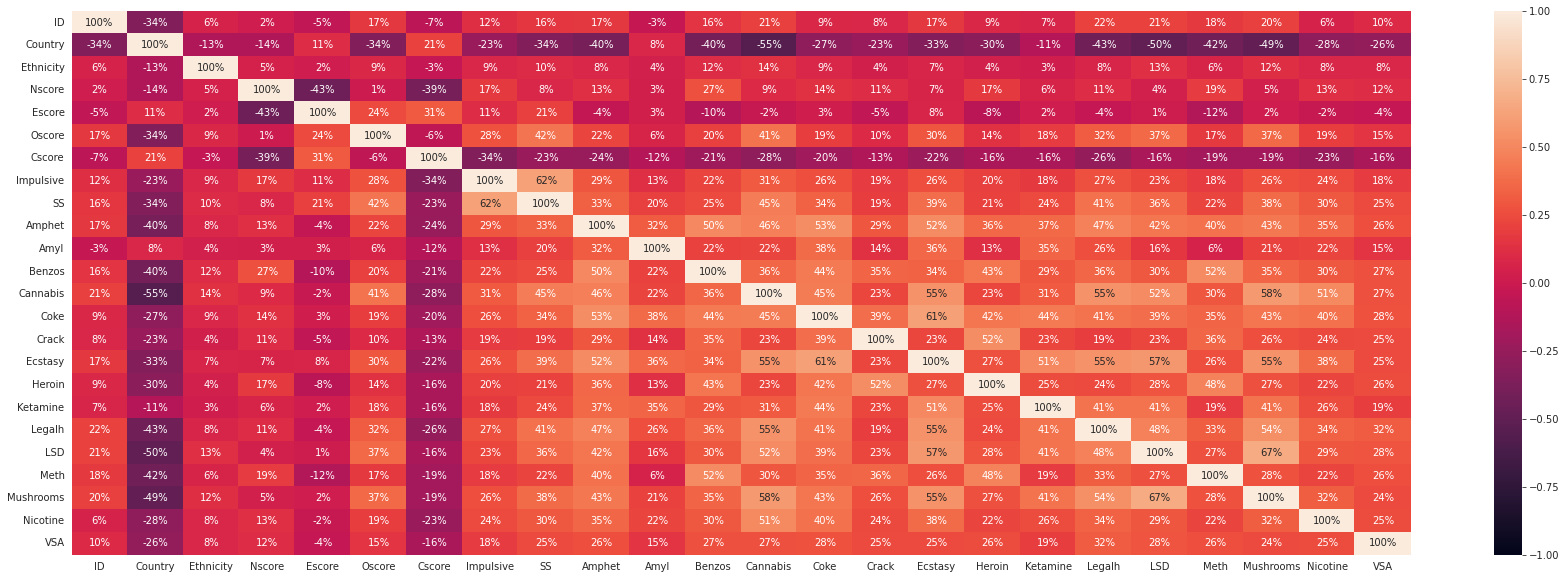

In [ ]:
corr = df_2.corr()
plt.figure(figsize=(30,10))
sns.heatmap(corr, annot=True,vmin=-1, fmt='.0%')
plt.show()

In [ ]:
# From the correlation heatmap, Age, Gender, Education, Alcohol, AScore had mostly low
# correlations, so we drop them

low_corr = ['Age', 'Gender', 'Education', 'Alcohol','AScore','Caff']
for column in low_corr:
    df_2 = df_2.drop(column, axis=1)
df_2.head()

,ID,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsive,SS,Amphet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,2,0.96082,-0.31685,-0.67825,1.93886,1.43533,-0.14277,-0.71126,-0.21575,2,2,0,4,3,0,4,0,2,0,2,3,0,4,0
1,3,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.01450,-1.37983,0.40148,0,0,0,3,0,0,0,0,0,0,0,0,1,0,0
2,4,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.58489,-1.37983,-1.18084,0,0,3,2,2,0,0,0,2,0,0,0,0,2,0
3,5,0.96082,-0.31685,0.73545,-1.63340,-0.45174,1.30612,-0.21712,-0.21575,1,1,0,3,0,0,1,0,0,1,0,0,2,2,0
4,6,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,1.63088,-1.37983,-1.54858,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0


## Feature Engineering

In [ ]:
cocaine_df = df_2.copy()
cocaine_df['coke_user'] = cocaine_df['Coke'].apply(lambda x: 0.5 if x not in [0,1] else 0)
cocaine_df['crack_user'] = cocaine_df['Coke'].apply(lambda x: 0.5 if x not in [0,1] else 0)
cocaine_df['both_user'] = cocaine_df[['coke_user', 'crack_user']].iloc[:].sum(axis=1)
cocaine_df['Cocaine_User'] = cocaine_df['both_user'].apply(lambda x: 1 if x > 0 else 0)
cocaine_df = cocaine_df.drop(['coke_user', 'crack_user', 'both_user' ], axis=1)

In [ ]:
meth_df = df_2.copy()
meth_df['Meth_User'] = meth_df['Meth'].apply(lambda x: 1 if x not in [0,1] else 0)
meth_df = meth_df.drop(['Meth'], axis=1)

In [ ]:
heroin_df = df_2.copy()
heroin_df['Heroin_User'] = heroin_df['Heroin'].apply(lambda x: 1 if x not in [0,1] else 0)
heroin_df = heroin_df.drop(['Heroin'], axis=1)

## Data Preprocessing

In [ ]:
# Splitting data into train and test 
def preprocessing_inputs(df_2, column):
    df_2 = df_2.copy()
    
    # Split df into X and y
    y = df_2[column]
    X = df_2.drop(column, axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), 
                           index=X_train.index, 
                           columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), 
                          index=X_test.index, 
                          columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [ ]:
def plot_confusion_matrix(y,y_predict):
    #Function to easily plot confusion matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues');
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['non-user', 'user']); ax.yaxis.set_ticklabels(['non-user', 'user'])

## Model Training and fitting

## Cocaine

In [ ]:
X_train, X_test, y_train, y_test = preprocessing_inputs(cocaine_df, 'Cocaine_User')

In [ ]:
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (1500, 24) (1500,)
Test set: (376, 24) (376,)


In [ ]:
models = {
            'Logistic Regression': LogisticRegression(),
            'Ridge Classifier': RidgeClassifier(),
            'Support Vector Machines': SVC(),
            'Random Forest Classifier': RandomForestClassifier()}

In [ ]:
meth_df = df_2.copy()
meth_df['Meth_User'] = meth_df['Meth'].apply(lambda x: 1 if x not in [0,1] else 0)
meth_df = meth_df.drop(['Meth'], axis=1)

In [ ]:
# Splitting data into train and test 
def preprocessing_inputs(df_2, column):
    df_2 = df_2.copy()
    
    # Split df into X and y
    y = df_2[column]
    X = df_2.drop(column, axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), 
                           index=X_train.index, 
                           columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), 
                          index=X_test.index, 
                          columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [ ]:
def plot_confusion_matrix(y,y_predict):
    #Function to easily plot confusion matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues');
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['non-user', 'user']); ax.yaxis.set_ticklabels(['non-user', 'user'])

## Model Training and fitting

In [ ]:
X_train, X_test, y_train, y_test = preprocessing_inputs(cocaine_df, 'Cocaine_User')

In [ ]:
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (1500, 24) (1500,)
Test set: (376, 24) (376,)


In [ ]:
models = {
            'Logistic Regression': LogisticRegression(),
            'Ridge Classifier': RidgeClassifier(),
            'Support Vector Machines': SVC(),
            'Random Forest Classifier': RandomForestClassifier()}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

Logistic Regression trained.
Ridge Classifier trained.
Support Vector Machines trained.
Random Forest Classifier trained.


In [ ]:
print('                  ACCURACY')
for name, model in models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    
    print(name + ' Accuracy: {:.2%}'.format(acc))
print('---------------------------------------------')
print('                  F1 SCORES')
for name, model in models.items():
    yhat = model.predict(X_test)
    f1 = f1_score(y_test, yhat, pos_label=1)
    print(name + ' F1-Score: {:.5}'.format(f1))

                  ACCURACY
Logistic Regression Accuracy: 100.00%
Ridge Classifier Accuracy: 100.00%
Support Vector Machines Accuracy: 99.73%
Random Forest Classifier Accuracy: 100.00%
---------------------------------------------
                  F1 SCORES
Logistic Regression F1-Score: 1.0
Ridge Classifier F1-Score: 1.0
Support Vector Machines F1-Score: 0.99631
Random Forest Classifier F1-Score: 1.0


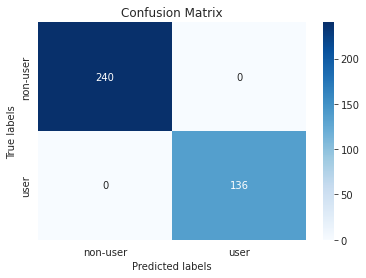

In [ ]:
# Confusion matrix of Best performing model
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
plot_confusion_matrix(y_test, yhat)

# Methamphetamine

In [ ]:
X_train, X_test, y_train, y_test = preprocessing_inputs(meth_df, 'Meth_User')

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

Logistic Regression trained.
Ridge Classifier trained.
Support Vector Machines trained.
Random Forest Classifier trained.


## Model Results

In [ ]:
print('                  ACCURACY')
for name, model in models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    print(name + ' Accuracy: {:.2%}'.format(acc))
print('---------------------------------------------')
print('                  F1 SCORES')
for name, model in models.items():
    yhat = model.predict(X_test)
    f1 = f1_score(y_test, yhat, pos_label=1)
    print(name + ' F1-Score: {:.5}'.format(f1))

                  ACCURACY
Logistic Regression Accuracy: 84.57%
Ridge Classifier Accuracy: 85.37%
Support Vector Machines Accuracy: 84.84%
Random Forest Classifier Accuracy: 84.84%
---------------------------------------------
                  F1 SCORES
Logistic Regression F1-Score: 0.60274
Ridge Classifier F1-Score: 0.60993
Support Vector Machines F1-Score: 0.58394
Random Forest Classifier F1-Score: 0.59574


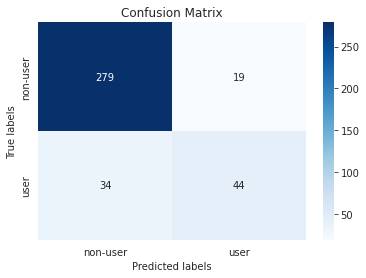

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
plot_confusion_matrix(y_test, yhat)

## Task 3

In [ ]:
from sklearn.datasets import load_linnerud # importing library that contains the linnerud dataset

In [ ]:
dataset = load_linnerud()            # instantiating the data loader


In [ ]:
dataset   # dataset is a numpy array which we'll try to convert to a pandas dataframe

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [ ]:
linn_features = pd.DataFrame(dataset.data, columns=dataset.feature_names) # changing the features to dataframe

In [ ]:
linn_features.head(3)

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0


In [ ]:
linn_targets = pd.DataFrame(dataset.target, columns=dataset.target_names) # changing the features to dataframe

In [ ]:
linn_targets.head(3)

,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0


In [ ]:
sklearn_dataset = linn_features.merge(linn_targets, left_index=True, right_index=True) # merging the both dataframes
sklearn_dataset.head(5)

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


Exploratory data analyses and data visualisation

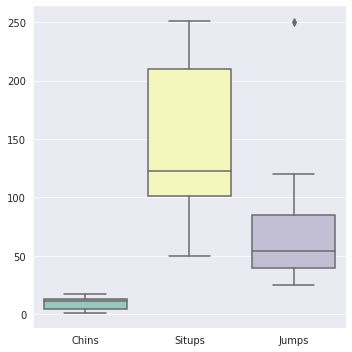

In [ ]:
sns.set_style("darkgrid")
sns.catplot(kind="box", data=linn_features)     # there was no significant outliers but features are skewed
plt.show()

In [ ]:
linn_features.describe()           # the mean and stds vary largly between the features.
                                    # there were also marked difference between the minimum and maximum values within each columns
                                  # If we use this dataset without normalisation, we then risk a situation in which the larger values dominate the smaller ones in which case the model over generalise on unseen data

,Chins,Situps,Jumps
count,20.000000,20.000000,20.00000
mean,9.450000,145.550000,70.30000
std,5.286278,62.566575,51.27747
min,1.000000,50.000000,25.00000
25%,4.750000,101.000000,39.50000
50%,11.500000,122.500000,54.00000
75%,13.250000,210.000000,85.25000
max,17.000000,251.000000,250.00000


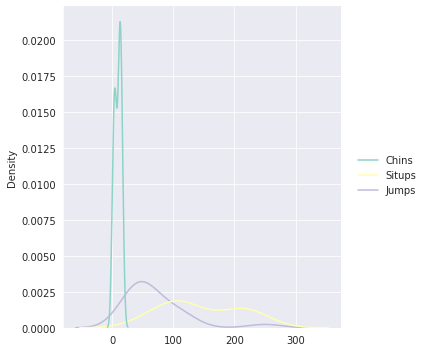

In [ ]:
sns.displot(data=linn_features, kind="kde")           #  Situps and jumps are faily gaussian in nature while Chins is negatively skewed with a sharp kurtosis. 
plt.show()                                           # So standardization looks like the right approach to suitably get the features to become a normal distribution
                                    

In [ ]:
# Since we also have a clue of what target we're predicting in which case, that would be continous variables where Linearregressor will be used, we can conclude that standardization should be used

Data preprocessing
(standardization)

In [ ]:
scaler_linnerud = StandardScaler()
scaled_linnerud_dataset = scaler_linnerud.fit_transform(linn_features)
scaled_linnerud_dataset = pd.DataFrame(scaled_linnerud_dataset, columns=linn_features.columns)

In [ ]:
scaled_linnerud_dataset.head()

,Chins,Situps,Jumps
0,-0.863671,0.269750,-0.206086
1,-1.445921,-0.582956,-0.206086
2,0.494912,-0.730539,0.614257
3,0.494912,-0.664946,-0.666279
4,0.688996,0.154963,-0.246103


Data visualisation

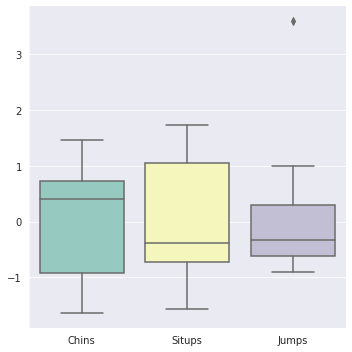

In [ ]:
sns.set_style("darkgrid")
sns.catplot(kind="box", data=scaled_linnerud_dataset)     # Boxplot showed an imporvement in the data distribution after scaling  
                                                          # The data now more resemble a normal distribution with standard deviation being 1 across features
plt.show()

In [ ]:
scaled_linnerud_dataset.describe()  # std is now equal across features

,Chins,Situps,Jumps
count,2.000000e+01,2.000000e+01,2.000000e+01
mean,1.776357e-16,-2.164935e-16,3.330669e-17
std,1.025978e+00,1.025978e+00,1.025978e+00
min,-1.640004e+00,-1.566847e+00,-9.063789e-01
25%,-9.121915e-01,-7.305392e-01,-6.162576e-01
50%,3.978708e-01,-3.779782e-01,-3.261364e-01
75%,7.375166e-01,1.056863e+00,2.991251e-01
max,1.465329e+00,1.729189e+00,3.595503e+00


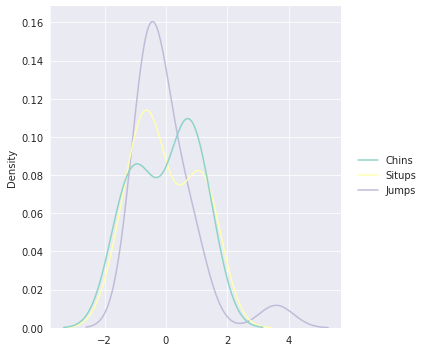

In [ ]:
sns.displot(data=scaled_linnerud_dataset, kind="kde")     # we now have a fairly Gaussian distribution and this is easier to see using a kdeplot
plt.show()

## Task 4

In [ ]:
import sklearn.datasets
newsgrp = sklearn.datasets.fetch_20newsgroups_vectorized(subset="train")
train_subset = newsgrp.data
train_subset.shape


(11314, 130107)

## Data Preprocessing
Feature scaling

In [ ]:
scaler = StandardScaler(with_mean=False, with_std=False)

In [ ]:
scaled_train_subset = scaler.fit_transform(train_subset)

KernelPCA and feature tunning 

In [ ]:
kpca = KernelPCA(kernel="rbf")

In [ ]:
scaled_kpca = kpca.fit_transform(scaled_train_subset)

In [ ]:
scaled_kpca.shape       # the dataset is now reduced to 5 features

(11314, 11311)

In [ ]:
explained_variance = np.var(scaled_kpca, axis=0)
explained_variance

array([7.51308464e-07, 2.70222616e-07, 1.76744575e-07, ...,
       3.73317240e-14, 2.24023465e-14, 5.43968922e-18])

In [ ]:
explained_variance_ratio = explained_variance / np.sum(explained_variance)

In [ ]:
explained_variance_ratio

array([7.20594744e-02, 2.59175833e-02, 1.69519203e-02, ...,
       3.58055917e-09, 2.14865318e-09, 5.21731306e-13])

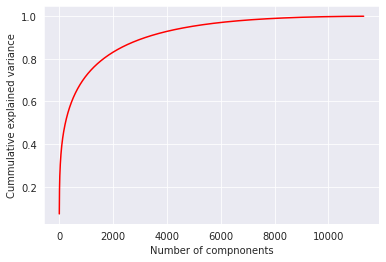

In [ ]:
plt.plot(np.cumsum(explained_variance_ratio), color="r")
plt.xlabel("Number of compnonents")
plt.ylabel("Cummulative explained variance")
plt.show()

In [ ]:
pd.DataFrame(explained_variance_ratio).merge(pd.DataFrame(np.cumsum(explained_variance_ratio)))

,0
0,0.072059


In [ ]:
"""train_subset.shape, X_kpca.shape          # the dimention of the dataset has been altered from
                                          # Why is this important? because it allows for less model complexity in which case, computattional time and resources are reduced, model performed better and more accurately,
                                          # and overall the model is easier to trained and understand"""

'train_subset.shape, X_kpca.shape          # the dimention of the dataset has been altered from\n                                          # Why is this important? because it allows for less model complexity in which case, computattional time and resources are reduced, model performed better and more accurately,\n                                          # and overall the model is easier to trained and understand'